In [2]:
import numpy as np
import pandas as pd
import datetime

import pytest

from Outcomes import outcomes
from SEIR.utils import config

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path

#import seaborn as sns
import pyarrow.parquet as pq
import click
import pyarrow as pa

import os

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

from SEIR import NPI, setup, file_paths
from SEIR.utils import config
import pathlib

config_names = ['config_SMH_R12_optSev_highIE_resume.yml']
#config_names = ['config_test_npi_reduce.yml']
ndraw = 10
res = {}

NotFoundError: seir.parameters.sigma not found

In [4]:
df = pq.read_table('model_output/seir/USA/inference/med/test/global/intermediate/000000001.000000001.000000001.test.seir.parquet').to_pandas()

In [13]:
df = df[(df['value_type'] == 'incidence') & (df['mc_infection_stage'] == 'I1')].drop(['mc_infection_stage','value_type'],axis=1)

<AxesSubplot:xlabel='date'>

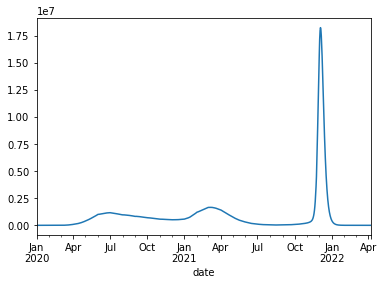

In [19]:
df.groupby('date').sum().sum(axis=1).plot()

<AxesSubplot:xlabel='date'>

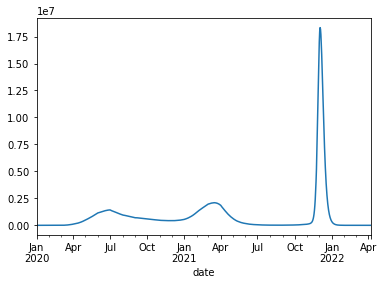

In [54]:
df = pq.read_table('model_output/seir/USA/inference/med/test/global/intermediate/000000001.000000000.test.seir.parquet').to_pandas()
df = df[(df['value_type'] == 'incidence') & (df['mc_infection_stage'] == 'I1')].drop(['mc_infection_stage','value_type'],axis=1)
df.groupby('date').sum().sum(axis=1).plot()

<AxesSubplot:xlabel='date'>

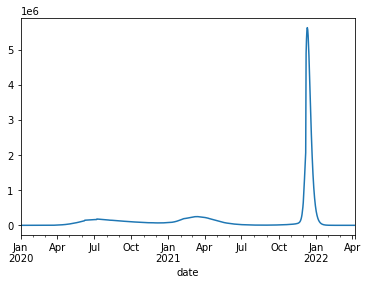

In [51]:
df = pq.read_table('model_output/hosp/USA/inference/med/test/global/intermediate/000000001.000000001.000000001.test.hosp.parquet').to_pandas()
df.groupby('date').sum()['incidC'].plot()

<AxesSubplot:xlabel='date'>

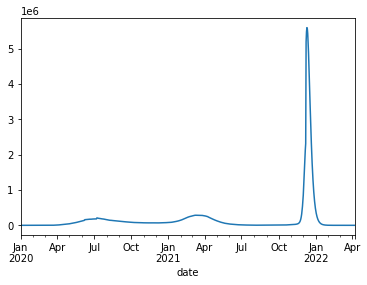

In [ ]:
df = pq.read_table('model_output/hosp/USA/inference/med/test/global/intermediate/000000001.000000001.000000001.test.hosp.parquet').to_pandas()
df.groupby('date').sum()['incidC'].plot()

In [61]:
df = pq.read_table('model_output/snpi/USA/inference/med/test/global/intermediate/000000001.000000001.000000001.test.snpi.parquet').to_pandas()
df

,geoid,npi_name,start_date,end_date,parameter,reduction
0,56000,local_variance,2020-01-01,2022-04-09,r0,0.022144
1,50000,local_variance,2020-01-01,2022-04-09,r0,0.026780
2,11000,local_variance,2020-01-01,2022-04-09,r0,0.039615
3,02000,local_variance,2020-01-01,2022-04-09,r0,0.015533
4,38000,local_variance,2020-01-01,2022-04-09,r0,-0.033190
...,...,...,...,...,...,...
4713,56000,WY_Dose1_apr2022_age18to64,2022-04-01,2022-04-09,nu1age18to64_new,0.000550
4714,56000,WY_Dose1_apr2022_age65to100,2022-04-01,2022-04-09,nu1age65to100_new,0.001180
4715,56000,WY_Dose3_apr2022_0to17,2022-04-01,2022-04-09,nu3age0to17_new,0.000667
4716,56000,WY_Dose3_apr2022_18to64,2022-04-01,2022-04-09,nu3age18to64_new,0.001376


In [27]:
import numpy as np
import os
import pytest
import warnings
import shutil

import pathlib
import pyarrow as pa
import pyarrow.parquet as pq
import filecmp
import pandas as pd
import matplotlib.pyplot as plt

import SEIR.seir
from SEIR import compartments, seir, NPI, file_paths, setup

from SEIR.utils import config

DATA_DIR = "data/"

config.clear()
config.read(user=False)
config.set_file(f"config_SMH_R12_optSev_highIE_resume.yml")
sim_id = 1

ss = setup.SpatialSetup(setup_name="test_seir",
                        geodata_file=f"{DATA_DIR}/geodata_2019_statelevel.csv",
                        mobility_file=f"{DATA_DIR}/mobility_2011-2015_statelevel.csv",
                        popnodes_key="pop2019est",
                        nodenames_key="geoid")

index = 1
run_id = 'test_SeedOneNode'
prefix = ''
s = setup.Setup(
    setup_name=config["name"].get() + "_" + str(scenario),
    spatial_setup=setup.SpatialSetup(
        setup_name=spatial_config["setup_name"].get(),
        geodata_file=spatial_base_path / spatial_config["geodata"].get(),
        mobility_file=spatial_base_path / spatial_config["mobility"].get(),
        popnodes_key=spatial_config["popnodes"].get(),
        nodenames_key=spatial_config["nodenames"].get()
    ),
    nsim=nsim,
    npi_scenario=scenario,
    npi_config=config["interventions"]["settings"][scenario],
    seeding_config=config["seeding"],
    initial_conditions_config=config["initial_conditions"],
    parameters_config=config["seir"]["parameters"],
    compartments_config=config["seir"],
    ti=config["start_date"].as_date(),
    tf=config["end_date"].as_date(),
    interactive=interactive,
    write_csv=write_csv,
    write_parquet=write_parquet,
    dt=config["dt"].as_number(),
    first_sim_index = index,
    in_run_id = run_id,
    in_prefix = prefix,
    out_run_id = run_id,
    out_prefix = prefix
)

In [24]:
npi = NPI.NPIBase.execute(npi_config=s.npi_config,
                                  global_config=config,
                                  geoids=s.spatset.nodenames,
                                  pnames_overlap_operation_sum=s.parameters.intervention_overlap_operation['sum'])

In [32]:
p_draw = s.parameters.parameters_quick_draw(s.n_days, s.nnodes)

In [34]:
parameters = s.parameters.parameters_reduce(p_draw, npi)

In [35]:
parameters.shape

(29, 830, 51)

In [39]:
s.parameters.get_pnames2pindex().keys()

dict_keys(['sigma_NEW', 'alpha_NEW', 'r0_NEW', 'gamma_NEW', 'theta1_WILD_NEW', 'theta2_WILD_NEW', 'theta1_ALPHA_NEW', 'theta2_ALPHA_NEW', 'thetaW_age0to17_NEW', 'thetaW_age18to64_NEW', 'thetaW_age65to100_NEW', 'theta1_DELTA_NEW', 'theta2_DELTA_NEW', 'thetaW_OMICRON_age0to17_NEW', 'thetaW_OMICRON_age18to64_NEW', 'thetaW_OMICRON_age65to100_NEW', 'theta1_OMICRON_NEW', 'theta2_OMICRON_NEW', 'nu1age0to17_NEW', 'nu3age0to17_NEW', 'nu1age18to64_NEW', 'nu3age18to64_NEW', 'nu1age65to100_NEW', 'nu3age65to100_NEW', 'nu2_NEW', 'chi1_NEW', 'chi2_NEW', 'chi3_NEW', 'epsilon_NEW'])

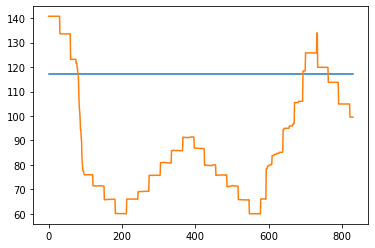

In [45]:
fig, ax = plt.subplots(1,1)
ax.plot(p_draw[s.parameters.get_pnames2pindex()['r0_NEW']].sum(axis=1))
ax.plot(parameters[s.parameters.get_pnames2pindex()['r0_NEW']].sum(axis=1))

array([117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3, 117.3,
       117.3, 117.3,